In [1]:
import os
import nltk
import re
import operator
import gensim 
import numpy as np
from stemming.porter2 import stem
from nltk.corpus import stopwords
#from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import time 



dictionary = {}
nltk.download('stopwords')
stopWords = set(stopwords.words('spanish'))
stopW_without_punctuation = []

documents = list()

for i in stopWords:
    stopW_without_punctuation.append(re.sub(r'[^\w\s]','',i))


with open('../../../Downloads/01got.txt','r') as f:
    for line in f:
        #delete Punctuation
        line = re.sub(r'[^\w\s]','',line)
        tempLine = ""
        for word in line.split():
            word = word.lower()
            #Stop Words
            if word not in stopW_without_punctuation:
                temp_w = stem(word)
                tempLine += temp_w + " "
                if temp_w in dictionary:
                    dictionary[temp_w]=dictionary[temp_w] + 1
                else:
                    dictionary[temp_w]=1
                
        tempLine = tempLine.strip()
        documents.append(tempLine.split())
    

print(len(dictionary))

sorted_dictionary = sorted(dictionary.items(), key=operator.itemgetter(1))

print(sorted_dictionary[0])
print(sorted_dictionary[1])
print(sorted_dictionary[2])
print(sorted_dictionary[3])
print(sorted_dictionary[4])

print(sorted_dictionary[-1])
print(sorted_dictionary[-2])
print(sorted_dictionary[-3])
print(sorted_dictionary[-4])
print(sorted_dictionary[-5])
print(sorted_dictionary[-6])
print(sorted_dictionary[-7])
print(sorted_dictionary[-8])
print(sorted_dictionary[-9])
print(sorted_dictionary[-10])


t = time.time()
model = gensim.models.Word2Vec (documents, size=100, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=10)
t2 = time.time()
print("Tiempo de entrenamiento: ", (t2 - t))



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/feliperojos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
16782
('m', 1)
('throne', 1)
('octubr', 1)
('jame', 1)
('sinclair', 1)
('dijo', 1608)
('ser', 1231)
('hombr', 1116)
('si', 1108)
('lord', 855)
('jon', 838)
('rey', 823)
('mano', 801)
('ned', 773)
('señor', 703)
Tiempo de entrenamiento:  1.5725791454315186


In [2]:
print("Sansa sim: ",model.wv.most_similar('sansa'))
print("")
print("Arya sim: ",model.wv.most_similar('arya'))
print("")
print("Jon sim: ",model.wv.most_similar('jon'))
print("")
print("Stark sim: ",model.wv.most_similar('stark'))
print("")
print("Ned sim: ",model.wv.most_similar('ned'))
print("")
print("Targaryen sim: ",model.wv.most_similar('targaryen'))
print("")
print("Lannister sim: ",model.wv.most_similar('lannist'))
print("")
print("Tyrion sim: ",model.wv.most_similar('tyrion'))


Sansa sim:  [('arya', 0.9089903831481934), ('decepciona', 0.821498453617096), ('liláceo', 0.8086718320846558), ('dama', 0.800781786441803), ('mordan', 0.794775664806366), ('soñast', 0.7854097485542297), ('acompañando', 0.7653645277023315), ('paseó', 0.7625895738601685), ('legítima', 0.7607917785644531), ('septa', 0.7587180137634277)]

Arya sim:  [('sansa', 0.9089905023574829), ('llorar', 0.8085020780563354), ('sobresaltada', 0.7963324189186096), ('loba', 0.7899045944213867), ('hier', 0.7845968008041382), ('dama', 0.7837234735488892), ('avergonzada', 0.7826290130615234), ('boquiabierta', 0.7776505351066589), ('boquiabierto', 0.7752451300621033), ('entrecortada', 0.7745764851570129)]

Jon sim:  [('catelyn', 0.8442196846008301), ('chico', 0.8186751008033752), ('bran', 0.8016278743743896), ('sam', 0.8001469969749451), ('partí', 0.7918548583984375), ('robb', 0.7882533073425293), ('deserción', 0.7464160919189453), ('sonrisa', 0.7454900741577148), ('pyp', 0.740380585193634), ('clavando', 0.73

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


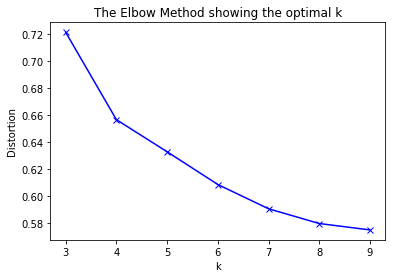

In [3]:
distortions = []
X = model[model.wv.vocab]
K = range(3,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()    
    

In [4]:
#Elbow menciona que se debe escoger el k en el cual cambia significativamente el aprendizaje, por lo que escojo k=5
kmeanModel = KMeans(n_clusters=5).fit(X)
kmeanModel.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
kmeanModel.labels_

array([0, 0, 1, ..., 0, 0, 1], dtype=int32)

In [6]:
print(kmeanModel.labels_.tolist().count(0))
print(kmeanModel.labels_.tolist().count(1))
print(kmeanModel.labels_.tolist().count(2))
print(kmeanModel.labels_.tolist().count(3))
print(kmeanModel.labels_.tolist().count(4))

5872
2131
599
128
511


In [7]:
#escojemos el cluster 0 1 y 2
c0 = []
c1 = []
c2 = []
dic = list(model.wv.vocab.keys())
for i in range(len(kmeanModel.labels_)):
    if kmeanModel.labels_[i]==0:
        c0.append(dic[i])
    if kmeanModel.labels_[i]==1:
        c1.append(dic[i])
    if kmeanModel.labels_[i]==2:
        c2.append(dic[i])
        

In [8]:
c0_freq = []
c1_freq = []
c2_freq = []
for c in c0:
    c0_freq.append([c,dictionary[c]])
for c in c1:
    c1_freq.append([c,dictionary[c]])
for c in c2:
    c2_freq.append([c,dictionary[c]])

print ("Cluster 0, top 10 palabras más comunes con sus frecuencias: ",sorted(c0_freq, key = lambda x : x[1], reverse = True)[:10])
print("")
print ("Cluster 1, top 10 palabras más comunes con sus frecuencias: ",sorted(c1_freq, key = lambda x : x[1], reverse = True)[:10])
print("")
print ("Cluster 2, top 10 palabras más comunes con sus frecuencias: ",sorted(c2_freq, key = lambda x : x[1], reverse = True)[:10])


Cluster 0, top 10 palabras más comunes con sus frecuencias:  [['agradezco', 13], ['colemon', 13], ['pausa', 12], ['conquistador', 12], ['equivocado', 11], ['arrancarl', 11], ['imaginado', 11], ['reunido', 11], ['othor', 11], ['dedicado', 10]]

Cluster 1, top 10 palabras más comunes con sus frecuencias:  [['tan', 578], ['dos', 391], ['gran', 256], ['tres', 198], ['vino', 175], ['castillo', 164], ['dragón', 151], ['último', 131], ['viseri', 122], ['part', 121]]

Cluster 2, top 10 palabras más comunes con sus frecuencias:  [['mano', 801], ['tyrion', 597], ['hacia', 575], ['espada', 559], ['mientra', 534], ['bran', 513], ['caballo', 481], ['vez', 453], ['dani', 444], ['arya', 439]]


In [9]:
#Veamos la dispersion en cluster
dis = np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)
print('Dispersion cluster 0: ',dis[0])
print('Dispersion cluster 1: ',dis[1])
print('Dispersion cluster 2: ',dis[2])

Dispersion cluster 0:  0.7725061042655149
Dispersion cluster 1:  0.8215536927288243
Dispersion cluster 2:  1.1120688629206883


In [10]:
#Freq promedio
m0 = 0
m1 = 0
m2 = 0
for c in c0:
    m0+=dictionary[c]
for c in c1:
    m1+=dictionary[c]
for c in c2:
    m2+=dictionary[c]
m0=m0/len(c0)
m1=m1/len(c1)
m2=m2/len(c2)
print('Freq promedio cluster 0: ',m0)
print('Freq promedio cluster 1: ',m1)
print('Freq promedio cluster 2: ',m2)

Freq promedio cluster 0:  3.317608991825613
Freq promedio cluster 1:  14.129516658845612
Freq promedio cluster 2:  61.96994991652755
